In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; 
seaborn.set()


In [8]:
data=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.3/diamonds.csv' , sep=",")

## .info()
### 컬럼명, Null값 여부, 데이터타입

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## pd.read_csv('data/diamonds.csv', index_col=1)
### index_col=1을 사용하면, 1번째 column이 index가 된다.

In [10]:
data2 = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.3/diamonds.csv', index_col=1)

In [11]:
data2.head()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
Premium,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
Good,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
Premium,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
Good,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## .values
### array에 넣어서 모든 값을 나타낸다.

In [12]:
data.values

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', ..., 4.05, 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

## .index
### index의 범위를 알려준다.

In [13]:
data.index

RangeIndex(start=0, stop=53940, step=1)

## .columns
### dataset의 컬럼명을 알려준다.

In [14]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## .shape
### (행, 열) 의 개수를 알려준다.

In [15]:
data.shape

(53940, 10)

## .describe()
### 수치형(numerical) 데이터의 통계적 수치를 알려준다.

In [16]:
data.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

## .describe(include='all')
### 모든 데이터의 통계적 수치를 알려준다. (범주형, 수치형 모두)

In [17]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## .describe(include=[np.number])
### describe의 기능과 같이 수치형 데이터의 통계적 수치들을 알려준다.

In [18]:
data.describe(include=[np.number])

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## .describe(include=[np.object])
### string 데이터의 통계적 수치를 나타낸다.

In [19]:
data.describe(include=[np.object])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## .describe(exclude=[np.number])
### numerical(수치형) 데이터를 제외한 값들의 describe를 나타낸다.

In [20]:
data.describe(exclude=[np.number])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## .describe(exclude=[np.object])
### string 데이터를 제외한 수치형 데이터만의 describe를 나타낸다.

In [21]:
data.describe(exclude=[np.object])

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## ['컬럼명']
### 지정한 컬럼이 Series 형태( index | 값 ) 로 나온다. 

In [22]:
first = data['carat']

In [23]:
first.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [24]:
first=data['carat']
second=data['price']

## pd.DataFrame(data,data)
### Series data를 DataFrame 형태로 변환할 수 있다.

In [25]:
new_data=pd.DataFrame(first,second)

In [26]:
new_data.head()

,carat
price,
326,0.53
326,0.53
327,0.72
334,0.71
335,0.71


## pd.DataFrame({'열의제목' : data })
### DataFrame으로 할때, 열의 제목을 지정할 수 있다.

In [27]:
new_data1=pd.DataFrame({'carat' : first , 'price' : second})

In [28]:
new_data1.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


## .describe(include =[np.object])
### DataFrame 에서도 describe를 할 수 있다.

In [29]:
data.describe(include =[np.object])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## data.transpose()
### describe에 transpose()를 사용하여 인덱스와 column의 위치를 바꿀 수 있다.

In [30]:
data.describe(include = [np.object]).transpose()

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


## .value_counts()
### index에 동일한 값들의 개수를 셀 수 있다.

In [31]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## .set_index("컬럼명", inplace = True)
### data의 특정 컬럼을 index로 지정하여 저장할 수 있다.

In [32]:
data.set_index("price", inplace = True)

In [33]:
data.index

Int64Index([ 326,  326,  327,  334,  335,  336,  336,  337,  337,  338,
            ...
            2756, 2756, 2757, 2757, 2757, 2757, 2757, 2757, 2757, 2757],
           dtype='int64', name='price', length=53940)

## .iloc[  : ]
### iloc는 파이썬 스타일이다.

In [34]:
data.iloc[1:5]

,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,
326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


## .loc [ : ]
### loc는 index의 값을 정확히 적어줘야 불러온다.

In [35]:
data.loc[326: 335]

,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,
326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


## .loc[[ , ], ['컬럼명']]
### 원하는 컬럼의 index를 불러올 수도 있다.

In [36]:
data.loc[[326,335], ['carat', 'cut']]

,carat,cut
price,,
326,0.23,Ideal
326,0.21,Premium
335,0.31,Good


## .loc[data['컬럼명'] == '값']
### 지정한 컬럼에 해당하는 지정값을 모두 불러온다.

In [37]:
data.loc[data['cut'] == 'Ideal']

,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,
326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
340,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
344,0.31,Ideal,J,SI2,62.2,54.0,4.35,4.37,2.71
348,0.30,Ideal,I,SI2,62.0,54.0,4.31,4.34,2.68
403,0.33,Ideal,I,SI2,61.8,55.0,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...
2756,0.79,Ideal,I,SI1,61.6,56.0,5.95,5.97,3.67
2756,0.71,Ideal,E,SI1,61.9,56.0,5.71,5.73,3.54
2756,0.71,Ideal,G,VS1,61.4,56.0,5.76,5.73,3.53


In [38]:
data[data['cut'] == 'Ideal']

,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,
326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
340,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
344,0.31,Ideal,J,SI2,62.2,54.0,4.35,4.37,2.71
348,0.30,Ideal,I,SI2,62.0,54.0,4.31,4.34,2.68
403,0.33,Ideal,I,SI2,61.8,55.0,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...
2756,0.79,Ideal,I,SI1,61.6,56.0,5.95,5.97,3.67
2756,0.71,Ideal,E,SI1,61.9,56.0,5.71,5.73,3.54
2756,0.71,Ideal,G,VS1,61.4,56.0,5.76,5.73,3.53


## .loc[data['cut'] == 'Ideal',['carat', 'cut', 'color']]
### 지정한 컬럼에 해당하는 지정값을 모두 불러올때, 보고싶은 특정열만 불러와서 볼 수도 있다.

In [39]:
data.loc[data['cut'] == 'Ideal',['carat', 'cut', 'color']]

,carat,cut,color
price,,,
326,0.23,Ideal,E
340,0.23,Ideal,J
344,0.31,Ideal,J
348,0.30,Ideal,I
403,0.33,Ideal,I
...,...,...,...
2756,0.79,Ideal,I
2756,0.71,Ideal,E
2756,0.71,Ideal,G


##  (data['cut'] == 'Ideal') & (data['carat'] > 0.5)
### cut이 Ideal이면서, carat이 0.5 초과 인 값들을 보여준다= 교집합

In [40]:
data.loc[(data['cut'] == 'Ideal') & (data['carat'] > 0.5),['carat', 'cut', 'color']]

,carat,cut,color
price,,,
2757,0.70,Ideal,E
2757,0.70,Ideal,G
2760,0.74,Ideal,G
2760,0.80,Ideal,I
2760,0.75,Ideal,G
...,...,...,...
2756,0.79,Ideal,I
2756,0.71,Ideal,E
2756,0.71,Ideal,G


# 시각화

In [96]:
table= data['cut'].value_counts()

In [97]:
table

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## plt.bar(table.index,table) 
### 범주형 데이터의 시각화(bar)로 보여준다.
### 1개 이상의 categorical 데이터와 , 1개의 수치형 데이터가 있다.
Reading numbers accurately from the chart

Comparing individual bars to each other

Exploring overall trends across categories

Data: One (or more) text (categorical) variable

Data: One numerical variable

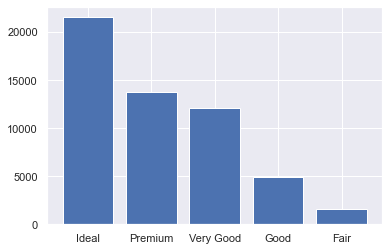

In [98]:
plt.bar(table.index,table)
plt.show()

In [99]:
iris=sns.load_dataset("iris")

## plt.hist(data['컬럼명'], bins = 10 )
### data의 특정 컬럼으로 histogram으로 시각화 할 수 있고, bins 로 (막대기 개수)class interval을 지정할 수 있다.
### label을 적어 축의 이름을 나타낼 수 있다.
### 1개의 연속적인 수치형 데이터가 있다.
Best used for

To show the density and distribution of continuous numerical data.  Note, that bar charts plots categorical data

Data: One continuous numerical variable

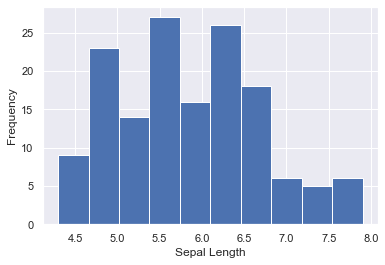

In [102]:
plt.hist(iris['sepal_length'], bins = 10) #histogram with bins (class interval) = 10 (equals part)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

## plt.scatter(data['컬럼명'] , data['컬럼명'])
### x축, y축에 들어갈 컬럼들을 적고, scatter plot로 시각화 한다.
### plt.title()로 시각화의 제목을 지정할 수 있다.
### 두개의 수치형 데이터가 있다.
Showing how one variable affects the other, or for showing precise, data dense visualizations, correlations, and clusters between two variables.

Data: Two numerical variables  

When a third numerical variable can be added to create a bubble chart.  The third variable changes the size of the dots. 

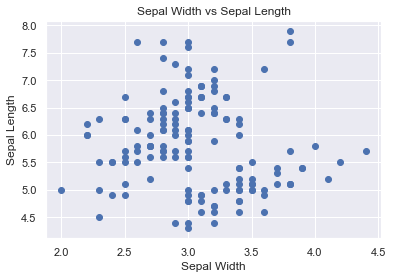

In [103]:
plt.scatter(iris['sepal_width'], iris['sepal_length']) #scatter plot with x = sepal_width and y = sepal_length
plt.title("Sepal Width vs Sepal Length")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

##  s=iris['petal_length']*30, alpha = 0.5
### *30 은 동그라미 크기를 조정하는 것, alpha는 선명도를 의미

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

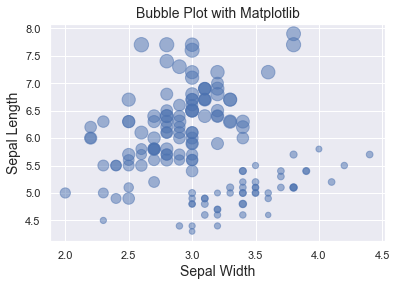

In [104]:
plt.scatter(iris['sepal_width'], iris['sepal_length'], 
             s=iris['petal_length']*30, alpha = 0.5)
plt.xlabel("Sepal Width", size=14)
plt.ylabel("Sepal Length", size=14)
plt.title("Bubble Plot with Matplotlib", size=14)

##   c= iris['petal_width']
### 4가지 columns 모두 비교분석 결과를 나타내기 위해, 동그라미의 크기, color까지 추가하여 나타내었다.
### 4개
### 여러개시각화

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

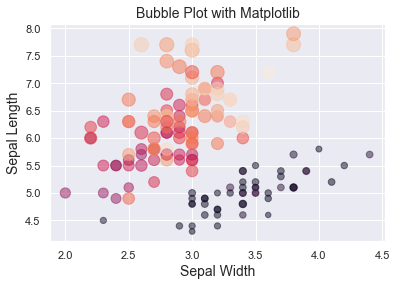

In [108]:
plt.scatter(iris['sepal_width'], iris['sepal_length'], 
             s=iris['petal_length']*30, 
             c= iris['petal_width'], alpha = 0.5)
plt.xlabel("Sepal Width", size=14)
plt.ylabel("Sepal Length", size=14)
plt.title("Bubble Plot with Matplotlib", size=14)

## .drop ("지우고싶은 컬럼명" , axis =1)
### 컬럼을 지운다.

In [109]:
newIris = iris.drop("species", axis = 1)

## boxplot(data[:] , data1 = data.columns)
### column의 개수만큼 적어서 boxplot를 그릴 수 있다.
Quartiles: Q1 (25th percentile), Q3 (75th percentile)

Inter-quartile range: IQR = Q3 - Q1

Five number summary: min, Q1, median, Q3, max

Boxplot: ends of the box are the quartiles; median is marked; add whiskers, and 
plot outliers individually

Outlier: usually, a value higher/lower than 1.5 x IQR

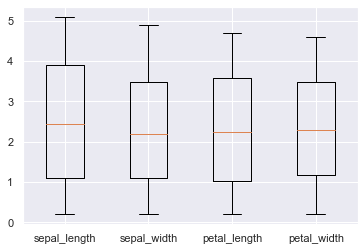

In [112]:
plt.boxplot(newIris[:4], labels = newIris.columns)
plt.show()

## pairplot( data, hue='컬럼명' , height=2.5);
### hue로 기준을 나눠 색깔을 정한다. 

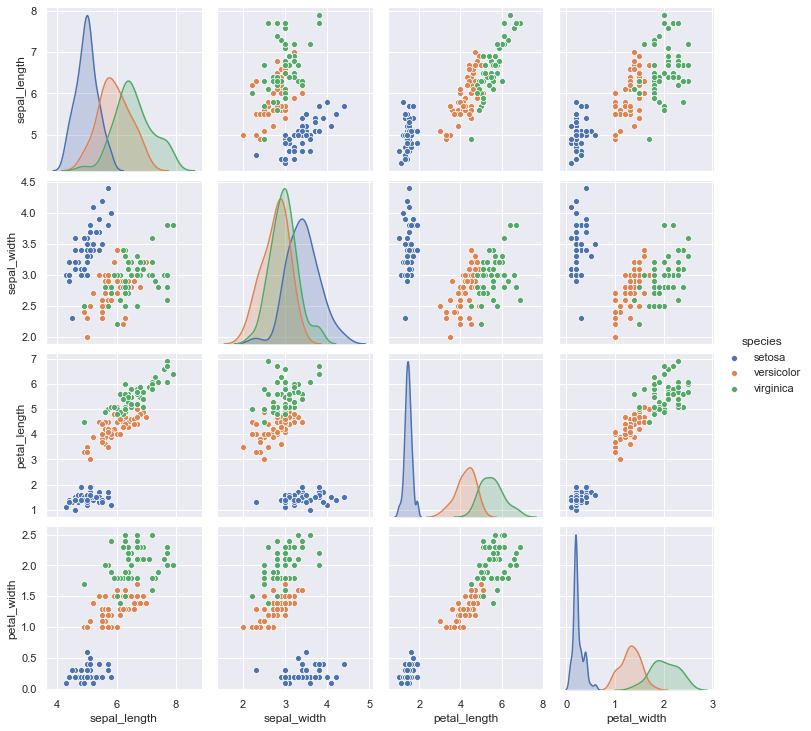

In [113]:
sns.pairplot(iris, hue='species', height=2.5); #the pairplot is colored based on the species

## heatmap(data.corr() , annot=True)
### 상관관계를 나타낼 수 있다. 
### annot은 수치를 나타내기 위함이다. 
Showing general trends
Data:

Data grid of two numerical or categorical variables

Third variable is (often the number of data points associated with the particular row and column) is encoded as the colour of the cell.
- heatmap 크기조절 : plt.subplots(figsize=(20,15))

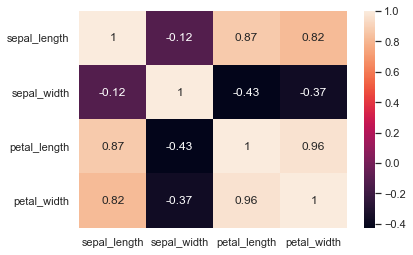

In [119]:
sns.heatmap(iris.corr(), annot=True)

In [115]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## .describe(include='all')
### 범주형과 수치형 모두 통계적수치를 나타낸다.

In [116]:
tips.describe(include ='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## data['새로운컬럼명'] = 조건식 
### 새로운 컬럼을 추가할 수 있다.

In [117]:
tips['tip_percent'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## .plot(kind='pip)
### pie chart 로 데이터를 시각화 할 수 있다.
### 한가지범주형
### 범주형1개

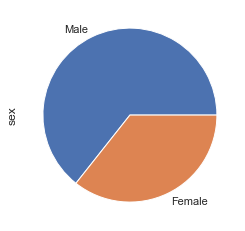

In [120]:
#check the proportion of the female and male using pie chart
tips['sex'].value_counts().plot(kind='pie') 

## sns.FaceGrid(data, row="컬럼명" , col="컬럼명" , margin_titles= True)
## .map(plt.hist, "컬럼명"
## bins=np.linspace(0,40,15)
### 범주형2개 수치형1개
### row와 col에 범주형데이터를 넣고, plt.hist에는 수치형데이터를 넣어서 표현한다
### bar의 크기를 키워 분석하기 용이하게 하기위해 bin의 크기를 조정할 수있다. np.linspace(strart , stop , num)
np.linspace(0, 1, 5) 
[0 , 0.25 , 0.5 , 0.75 , 1]

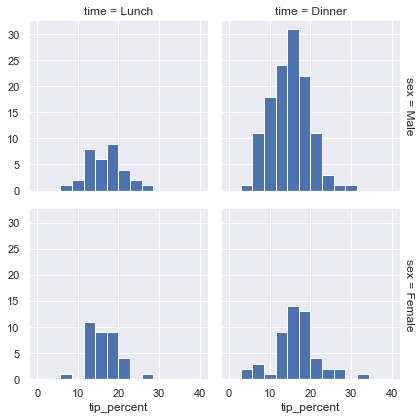

In [128]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_percent", bins=np.linspace(0, 40, 15)); 

## Factor plots
Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:
### 2개범주형과 1개수치형데이터를 분석하여 시각화 하는 방법
### sns.catplot("범주형data(x축)" , "수치형data(y축)" , "범주형data(소제목)")
### .set_axis_labels("x축"  , "y축");

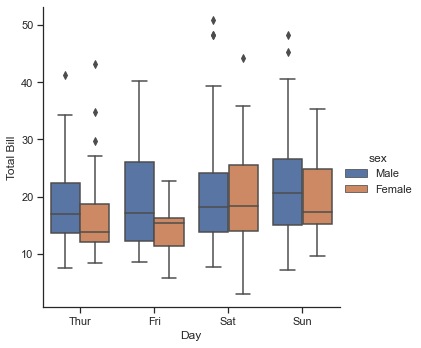

In [130]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

# Integrating 데이터 통합

In [171]:
dataEmp= pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.4/emp_dept.csv')

In [172]:
dataEmp

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [173]:
dataEmp2 = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.4/emp_date.csv')

In [174]:
dataEmp2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


## pd.merge(data, data1)
### 동일한 컬럼으로 데이터를 병합한다.

In [175]:
cDataEmp = pd.merge(dataEmp, dataEmp2)

In [176]:
cDataEmp

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [177]:
dataEmp3 = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.4/emp_supervisor.csv')

In [178]:
dataEmp3

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


## rw=pd.concat([red,white])
## rw
- 두 컬럼의 값이 달라도 데이터를 합칠 수 있는 유일한 방법
## pd.merge(data,data1,on="group")
### group이라는 동일한 열로 데이터를 병합한다.

In [179]:
cDataEmp2 = pd.merge(cDataEmp, dataEmp3, on="group")

In [180]:
cDataEmp2 

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [181]:
cDataEmp3 = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.4/emp_salary.csv')

In [185]:
cDataEmp3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,12000
3,Sue,90000


## pd.merge(data , data1 , left_on= "컬럼명" , right_on="컬럼명1" ).drop('지울컬럼명' , axix=1)
### 병합된 데이터프레임에 왼편에 컬럼명이 들어가고, 오른편에 컬럼명1이 들어간다.
컬럼명이 달라도 안에 들어가는 data 값이 같다면 병합할 수 있다.

In [187]:
cDataEmp5 = pd.merge(cDataEmp2, cDataEmp3, left_on="employee", right_on="name").drop('name', axis=1)

In [188]:
cDataEmp5 

,employee,group,hire_date,supervisor,salary
0,Bob,Accounting,2008,Carly,70000
1,Jake,Engineering,2012,Guido,80000
2,Lisa,Engineering,2004,Guido,12000
3,Sue,HR,2014,Steve,90000


# Handling Missing data 

### None값은 sum을 할 수 없다.

### np.nan값은 데이터타입이 float64이다.

### np.nan값은 sum, min, max를 할 수 있지만, 값은 다 nan으로 나온다. (ex: data.sum() => nan)

### Null이 있는 데이터를 sum,min,max하기 위해서는 np.nansum(data) 을 사용하여 할 수 있다.

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

## .isnull()
### True, False 형태로 반환

In [194]:
string= pd.Series([1, np.nan, 'hello', None])

In [196]:
string.isnull()

0    False
1     True
2    False
3     True
dtype: bool

## .notnull()
### Null값이 아닌 index와 값을 반환

In [197]:
string[string.notnull()]

0        1
2    hello
dtype: object

## .dropna()
### Null값이 있는 행을 지우고 반환

In [198]:
string.dropna()

0        1
2    hello
dtype: object

In [199]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## dropna() - DataFrame
### Null값이 있는 행 전체를 지우고 반환

In [200]:
df.dropna()

,0,1,2
1,2.0,3.0,5


## .dropna(axis='colums')
### Null값이 있는 열 전체를 지우고 반환

In [201]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


## data[]=np.nan
### data의 특정 열을 NaN값으로 채운다.

In [202]:
#create a new column and let the values are nan for all rows
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


## .dropna(axis='columns' , how='all')
### how='all'이라는 조건을 줘서, 모두 Null값인 열을 지운다.

In [203]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## .dropna(axis='rows', thresh=숫자)
### thresh는 적어도라는 의미로, 지정한 숫자만큼 최소한 값이 있는(Null값이 아닌) 행을 반환

In [206]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


## pd.Series([ ] , index=list(  ' ' )
### Series에 index를 지정한다.

In [205]:
S = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
S

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

## .fillna()
### Null값을 괄호안에 넣을 값으로 채울 수 있다.

In [207]:
S.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

## .fillna(method='ffill')
### Null값이 있으면 그 전index 값으로 대체하여 채운다.

In [208]:
S.fillna(method='ffill')# forward-fill

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

## .fillna(method='bfill')
### Null값이 있으면 그 뒤에index 값으로 대체하여 채운다.

In [210]:
S.fillna(method='bfill')# back-fill

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [213]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


## .fillna(method='ffill', axis=1)
### 마찬가지로 데이터프레임에서도 Null값을 열 기준 앞전 값으로 채운다. 

In [212]:
df.fillna(method='ffill', axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [215]:
data = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.5/.ipynb_checkpoints/property_data.csv')

In [216]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## print(data['컬럼명'].isnull()
### 특정 컬럼에 null이 있는지 없는지 반환

In [217]:
print(data['ST_NUM'].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


## na_values = missing_values
### n/a , na , --를 NaN값으로 반환되게 채우기.

In [220]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
data1 = pd.read_csv("C:/Users/82106/Desktop/2020-2학기/데싸/chap.5/.ipynb_checkpoints/property_data.csv", na_values = missing_values)

In [221]:
data1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## 에러메시지 보이기

In [223]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
         print("Oops!  That was no valid number.  Try again...")

Please enter a number: 1


In [224]:
#an example of try except
def this_fails():
    x = 1/0

try:
    this_fails()
except ZeroDivisionError as err:
        print('Handling run-time error:', err)

Handling run-time error: division by zero


In [225]:
# Detecting numbers 
cnt=0
for row in data1['OWN_OCCUPIED']:
    try:
        int(row)
        data1.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

## .isnull().sum()
### 컬럼마다 null값이 몇개 있는지 합계를 내준다 

In [226]:
print(data1.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64


## .isnull().value.any()
### Null이 하나라도 있으면 True 반환

In [227]:
print(data1.isnull().values.any())

True


## .isnull().sum().sum()
### data에 있는 모든 null값 합계

In [228]:
print(data1.isnull().sum().sum())

12


## .fillna(숫자 , inplace=True)
### data에 지정한 숫자로 null값을 대체하고 저장

In [229]:
data1['ST_NUM'].fillna(125, inplace=True)

In [230]:
data1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## .loc[index, '컬럼명'] = 값
### 해당하는 index에 지정한값 불러오기

In [231]:
data1.loc[2, 'ST_NUM'] = 130

## 중간값으로 null값 대체하는 방법 (median)

In [232]:
#Replace using median
median = data1['NUM_BEDROOMS'].median()
data1['NUM_BEDROOMS'].fillna(median, inplace=True)

# Aggregation and Grouping 

In [233]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

## data['컬럼명'].mean()
### 특정 컬럼에 평균을 구할 때

In [236]:
tips['total_bill'].mean()

19.785942622950824

## .groupby("컬럼명").조건식()
### gropby는 뒤에 반드시 조건식 .sum() , .mean() 등을 써줘야 나타낼 수 있다.

In [237]:
tips.groupby("sex")

In [238]:
tips.groupby("sex").sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


## .groupby(컬럼명)[컬럼명1].조건식()
### 컬럼명을 기준으로, 컬럼명1에 대한 조건식 값이 나온다.

In [241]:
tips.groupby("sex")['total_bill'].median()

sex
Male      18.35
Female    16.40
Name: total_bill, dtype: float64

## 특정 컬럼명으로 groupby 했을때, 행, 열의 개수 알아내기.

In [242]:
for (method, group) in tips.groupby('day'):
    print("{0:20s} shape={1}".format(method, group.shape))

Thur                 shape=(62, 7)
Fri                  shape=(19, 7)
Sat                  shape=(87, 7)
Sun                  shape=(76, 7)


## .groupby('컬럼명').aggregate(['조건식'])
### 컬럼명으로 groupby한다음 , 모든 컬럼에 대해 조건식을 나타낸다.

In [243]:
tips.groupby('day').aggregate(['min', np.median, max])

total_bill                 tip               size           
            min median    max   min median    max  min median max
day                                                              
Thur       7.51  16.20  43.11  1.25  2.305   6.70    1      2   6
Fri        5.75  15.38  40.17  1.00  3.000   4.73    1      2   4
Sat        3.07  18.24  50.81  1.00  2.750  10.00    1      2   5
Sun        7.25  19.63  48.17  1.01  3.150   6.50    2      2   6

## .groupby('컬럼명').aggregate({'컬럼명1': 'min', '컬럼명2': 'max'})
### 컬럼명으로 groupby한다음, 각 컬럼명에 대해 다른 조건식을 부여하여 값을 불러 올 수 있다.

In [244]:
#Finding the minimum total bill from the maximum size
tips.groupby('day').aggregate({'total_bill': 'min',
                             'size': 'max'})

,total_bill,size
day,,
Thur,7.51,6
Fri,5.75,4
Sat,3.07,5
Sun,7.25,6


## 특정함수를 사용하여 필터링(filltering) 하여 여러 데이터프레임을 나타내는 방법
#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [246]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [247]:
def filter_func(x):
    return x['total_bill'].std() > 9

display('tips.head()', "tips.groupby('day').std()", "tips.groupby('day').filter(filter_func)")

tips.head()
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

tips.groupby('day').std()
      total_bill       tip      size
day                                 
Thur    7.886170  1.240223  1.066285
Fri     8.302660  1.019577  0.567131
Sat     9.480419  1.631014  0.819275
Sun     8.832122  1.234880  1.007341

tips.groupby('day').filter(filter_func)
     total_bill   tip     sex smoker  day    time  size
19        20.65  3.35    Male     No  Sat  Dinner     3
20        17.92  4.08    Male     No  Sat  Dinner     2
21        20.29  2.75  Female     No  Sat  Dinner     2
22        15.77  2.23  Female     No  Sat  Dinner     2
23        39.42  7.58    Male     No  Sat  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
238       35.83  4.67  Female     No  Sat  Dinner     3
239       29.03  5.92    Male     No  Sat  Dinner     3
240       27.18  2.00  Female    Yes  Sat  Dinner     2
241       22.67  2.00    Male    Yes  Sat  Dinner     2
242       17.82  1.75    Male     No  Sat  Dinner     2

[87 rows x 7 columns]

## .groupby('컬럼명').transform(lambda x: x - x.mean())
### transform을 사용하여 값들을 조건식에 맞는 값으로 변환하는 방법 - day를 기준으로 계산이 되는것이므로, index에는 day로 groupby가 되지는 않지만 값에 의미를 지니고 있다.

### 성별에 따른 /  transform 
### null값채워넣기   - 과제 다시풀기 
### fillna
- ins["bmi"].fillna(ins.groupby("sex")["bmi"].transform("mean"), inplace=True)

In [248]:
tips.groupby('day').transform(lambda x: x - x.mean()).head()

,total_bill,tip,size
0,-4.42,-2.245132,-0.842105
1,-11.07,-1.595132,0.157895
2,-0.40,0.244868,0.157895
3,2.27,0.054868,-0.842105
4,3.18,0.354868,1.157895


## data['새로운 컬럼명'] = 조건식
### 새로운 컬럼을 추가하는 방법

In [249]:
tips['tip_percent'] = 100 * tips['tip'] / tips['total_bill']

## 컬럼명 이름 바꾸기.

In [250]:
tips['data1'] = tips['tip_percent']

## 데이터를 정규화 하는 식

In [251]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['tip_percent'].mean()
    return x

display('tips.head()', "tips.groupby('day').apply(norm_by_data2).head()")

,total_bill,tip,sex,smoker,day,time,size,tip_percent,data1
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.680765
,total_bill,tip,sex,smoker,day,time,size,tip_percent,data1
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,0.356188
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,0.961918
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,0.998143
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,0.837524


# pivot Tables

## .loc[range(숫자,숫자) , ['컬럼명' , '컬럼명1']]
### 지정한 range안에 있는 컬럼들을 보여준다.
### 지정
### 지정하고싶은
### 보고싶은컬럼

In [252]:
data = tips.loc[range(15,22), ['total_bill', 'tip', 'size', 'day', 'sex']]

In [253]:
data

,total_bill,tip,size,day,sex
15,21.58,3.92,2,Sun,Male
16,10.33,1.67,3,Sun,Female
17,16.29,3.71,3,Sun,Male
18,16.97,3.50,3,Sun,Female
19,20.65,3.35,3,Sat,Male
20,17.92,4.08,2,Sat,Male
21,20.29,2.75,2,Sat,Female


## .stack()
### 컬럼이 행으로 이동하여 나타냄. 

In [254]:
result = data.stack()

In [255]:
result

15  total_bill     21.58
    tip             3.92
    size               2
    day              Sun
    sex             Male
16  total_bill     10.33
    tip             1.67
    size               3
    day              Sun
    sex           Female
17  total_bill     16.29
    tip             3.71
    size               3
    day              Sun
    sex             Male
18  total_bill     16.97
    tip              3.5
    size               3
    day              Sun
    sex           Female
19  total_bill     20.65
    tip             3.35
    size               3
    day              Sat
    sex             Male
20  total_bill     17.92
    tip             4.08
    size               2
    day              Sat
    sex             Male
21  total_bill     20.29
    tip             2.75
    size               2
    day              Sat
    sex           Female
dtype: object

## .unstack()
### 행이 열로 올라감.

In [256]:
result.unstack()

,total_bill,tip,size,day,sex
15,21.58,3.92,2,Sun,Male
16,10.33,1.67,3,Sun,Female
17,16.29,3.71,3,Sun,Male
18,16.97,3.5,3,Sun,Female
19,20.65,3.35,3,Sat,Male
20,17.92,4.08,2,Sat,Male
21,20.29,2.75,2,Sat,Female


## .unstack().groupby('컬럼명').조건식()


In [258]:
result2 = result.unstack().groupby('day').sum()
result2

,total_bill,tip,size,sex
day,,,,
Sat,58.86,10.18,7,MaleMaleFemale
Sun,65.17,12.80,11,MaleFemaleMaleFemale


## .unstack(0)
### 0번째 level을 unstack

In [259]:
result2.unstack(0)

            day
total_bill  Sat                   58.86
            Sun                   65.17
tip         Sat                   10.18
            Sun                    12.8
size        Sat                       7
            Sun                      11
sex         Sat          MaleMaleFemale
            Sun    MaleFemaleMaleFemale
dtype: object

## .unstack('컬럼명')
### 컬럼명을 지정하여 unstack할 수도 있다.

In [260]:
result2.unstack('day')

            day
total_bill  Sat                   58.86
            Sun                   65.17
tip         Sat                   10.18
            Sun                    12.8
size        Sat                       7
            Sun                      11
sex         Sat          MaleMaleFemale
            Sun    MaleFemaleMaleFemale
dtype: object

## .unstack().groupby(['컬럼명','컬럼명1']).조건식

In [262]:
result3 = result.unstack().groupby(['day', 'sex']).sum()
result3

total_bill   tip  size
day sex                           
Sat Female       20.29  2.75     2
    Male         38.57  7.43     5
Sun Female       27.30  5.17     6
    Male         37.87  7.63     5

## .unstack().unstack()
### 가장 바깥쪽에 있는 열부터 순차적으로 unstack을 실행한다.

In [263]:
result3.unstack().unstack()

            sex     day
total_bill  Female  Sat    20.29
                    Sun    27.30
            Male    Sat    38.57
                    Sun    37.87
tip         Female  Sat     2.75
                    Sun     5.17
            Male    Sat     7.43
                    Sun     7.63
size        Female  Sat     2.00
                    Sun     6.00
            Male    Sat     5.00
                    Sun     5.00
dtype: float64

In [266]:
data01 = tips.loc[range(15,22), ['total_bill', 'tip', 'size', 'day']]
groupdata = data01.groupby('day').sum()

## .reset_index()
### index를 리셋한다.

In [268]:
g1 = groupdata.reset_index()
g1

,day,total_bill,tip,size
0,Thur,0.00,0.00,0
1,Fri,0.00,0.00,0
2,Sat,58.86,10.18,7
3,Sun,65.17,12.80,11


## pd.melt(data.['컬럼명'])
### melt를 했기 때문에, 컬럼명 | variable | value 의 columns가 나타나고, variable에는 data의 컬럼들이 나오고, value는 모든 값들이 나온다.

In [269]:
melted = pd.melt(g1, ['day'])
melted

,day,variable,value
0,Thur,total_bill,0.00
1,Fri,total_bill,0.00
2,Sat,total_bill,58.86
3,Sun,total_bill,65.17
4,Thur,tip,0.00
5,Fri,tip,0.00
6,Sat,tip,10.18
7,Sun,tip,12.80
8,Thur,size,0.00
9,Fri,size,0.00


## melted.pivot('index할 컬럼', '컬럼', ' value')

In [270]:
reshaped = melted.pivot('day', 'variable', 'value')
reshaped

variable,size,tip,total_bill
day,,,
Thur,0.0,0.00,0.00
Fri,0.0,0.00,0.00
Sat,7.0,10.18,58.86
Sun,11.0,12.80,65.17


## pd.melt( data , id_vars=['index할 컬럼명'] , value_vars=['값이 나올 컬럼명1'])

In [271]:
pd.melt(g1, id_vars=['day'], value_vars=['total_bill', 'tip'])

,day,variable,value
0,Thur,total_bill,0.00
1,Fri,total_bill,0.00
2,Sat,total_bill,58.86
3,Sun,total_bill,65.17
4,Thur,tip,0.00
5,Fri,tip,0.00
6,Sat,tip,10.18
7,Sun,tip,12.80


## id_vars를 지정하지 않아도 된다.

In [272]:
pd.melt(g1, value_vars=['total_bill', 'tip', 'size'])

,variable,value
0,total_bill,0.00
1,total_bill,0.00
2,total_bill,58.86
3,total_bill,65.17
4,tip,0.00
5,tip,0.00
6,tip,10.18
7,tip,12.80
8,size,0.00
9,size,0.00


## melted.columns = [['Key', 'Attribute', 'Values']]
### 컬럼명 이름 지정하기.

In [274]:
melted.columns = [['Key', 'Attribute', 'Values']]
melted

,Key,Attribute,Values
0,Thur,total_bill,0.00
1,Fri,total_bill,0.00
2,Sat,total_bill,58.86
3,Sun,total_bill,65.17
4,Thur,tip,0.00
5,Fri,tip,0.00
6,Sat,tip,10.18
7,Sun,tip,12.80
8,Thur,size,0.00
9,Fri,size,0.00


## 컬럼명 지정하기 2

In [275]:
melted_g1 = g1.melt(id_vars=['day'], var_name='Attribute', value_name='Values')
melted_g1

,day,Attribute,Values
0,Thur,total_bill,0.00
1,Fri,total_bill,0.00
2,Sat,total_bill,58.86
3,Sun,total_bill,65.17
4,Thur,tip,0.00
5,Fri,tip,0.00
6,Sat,tip,10.18
7,Sun,tip,12.80
8,Thur,size,0.00
9,Fri,size,0.00


## ['Values']를 써줌으로써, 지운다.

In [284]:
melted_g1.pivot(index='day', columns='Attribute')
original_g1 = melted_g1.pivot(index='day', columns='Attribute')['Values'].reset_index()
original_g1

Attribute,day,size,tip,total_bill
0,Thur,0.0,0.00,0.00
1,Fri,0.0,0.00,0.00
2,Sat,7.0,10.18,58.86
3,Sun,11.0,12.80,65.17


## .columns.name = None
### 왼쪽 꼭지점위치인 컬럼네임을 없애준다.

In [281]:
original_g1.columns.name = None
original_g1

,day,size,tip,total_bill
0,Thur,0.0,0.00,0.00
1,Fri,0.0,0.00,0.00
2,Sat,7.0,10.18,58.86
3,Sun,11.0,12.80,65.17


## pd.cut(data['컬럼명'], [구간])
### 컬럼을 지정한 구간으로 나눈다. 
### 30은 포함

In [286]:
bill = pd.cut(tips['total_bill'], [0, 30, 60])
bill

0      (0, 30]
1      (0, 30]
2      (0, 30]
3      (0, 30]
4      (0, 30]
        ...   
239    (0, 30]
240    (0, 30]
241    (0, 30]
242    (0, 30]
243    (0, 30]
Name: total_bill, Length: 244, dtype: category
Categories (2, interval[int64]): [(0, 30] < (30, 60]]

## pd.qcut(data['컬럼명'], 2)
### 데이터의 총 개수를 지정한 숫자만큼 나눈다. 

In [288]:
tip_q = pd.qcut(tips['tip'], 2)
tip_q

0      (0.999, 2.9]
1      (0.999, 2.9]
2       (2.9, 10.0]
3       (2.9, 10.0]
4       (2.9, 10.0]
           ...     
239     (2.9, 10.0]
240    (0.999, 2.9]
241    (0.999, 2.9]
242    (0.999, 2.9]
243     (2.9, 10.0]
Name: tip, Length: 244, dtype: category
Categories (2, interval[float64]): [(0.999, 2.9] < (2.9, 10.0]]

In [289]:
titanic = sns.load_dataset('titanic')

## groupby, aggregate, unstack 모두 할 수 있다. 
- groupby식 : ins1.groupby(['sex','smoker','children'])['bmi','expenses'].aggregate(['mean','median'])

In [290]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## .pivot_table(' value ' , index , columns) 

In [291]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## aggfunc 
### 각 컬럼에 대해 적용하고자 하는 조건식이 다르게 하여 구할 수도 있다.
### 다른열다른계산
### mean,sum
### 다른계산

In [292]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

## margins=True
### 각 행과 열 의 총합을 구할 수 있다. 
### All

In [293]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [294]:
births = pBA.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.6/births.csv')

## births['decade'] = 10 * (births['year'] // 10)
1960-1969 = 1960 / 1970-1979 = 1970 과 같이 묶은것.
#### 10년단위
#### 묶기

In [315]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


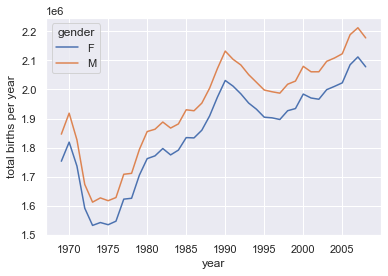

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [298]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

### 이 공식을 이용하여 이상한 데이터를 빼준다.

In [299]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

### 데이터타입변환하기 - 뒤에있는 공식을 적용하기위해 int로

In [300]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

## .dayofweek -> np.where
### 0 : Monday , 1 : ~~   요일별 인덱스 지정해주기
### 날짜데이터를 숫자로

In [301]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

## .gca().set_xticklabels([''])
### x축 이름 지정해주기.

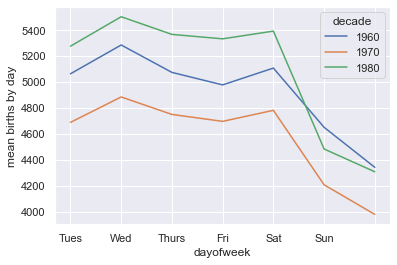

In [314]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [311]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [312]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

<ipython-input-312-2b877f2df70b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


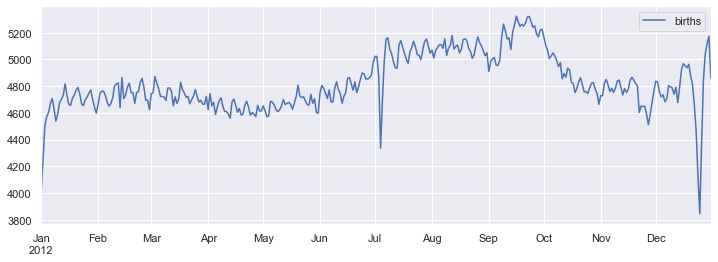

In [305]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# String

In [317]:
data = ['peter', 'Paul', 'MARY', 'gUIDO'] #String values in a variable
data

['peter', 'Paul', 'MARY', 'gUIDO']

## .capitalize()
### 맨 앞에 철자를 대문자로 바꿔준다. 하지만, None값이 있으면 바꿀 수 없다. 에러뜸

In [318]:
[s.capitalize() for s in data] #capitalize the element in the variable data

['Peter', 'Paul', 'Mary', 'Guido']

## pd.Series(data)
### string을 Series형태로 바꾼다.
### 시리즈형태

In [319]:
names = pd.Series(data) #String
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

## str.capitalize()
### Series형태일때, capitalize하는 방법

In [320]:
names.str.capitalize() #calling the .str to convert the related object into String

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [322]:
# String with more than one word
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

## .str.lower()
### string의 모든 문자를 소문자로 바꾼다.

In [323]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

## str.len()
### string의 길이

In [324]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

## str.startwith('T')
### string 시작 철자가 들어가면 True로 반환 한다. 

In [325]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

## str.split()
### ()안에 들어가는 부분으로 나누어서 인덱스로 저장

In [326]:
monte.str.split() #space

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## str.split()[index]
### index에 해당하는 행을 불러온다.

In [327]:
monte.str.split()[0]

['Graham', 'Chapman']

### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

## str[ : ]
### 해당하는 문자를 불러온다.

In [328]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

## str.split().str.get

In [329]:
monte.str.split().str[0]

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [330]:
# split (by the space) and call the last column
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [331]:
# create a new dataframe with two columns; name and info
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


## get_dummies()
### ()안에 들어가는 것을 기준으로 있으면 1 없으면 0 을 반환하는 데이터프레임을 만든다.

In [332]:
# split the String with a character (e.g., "|")
# one hot encoding scheme
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [333]:
try:
    recipes = pd.read_json('data/recipeitems-sample.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Expected object or value


In [336]:
# read the entire file into a Python array
with open('C:/Users/82106/Desktop/2020-2학기/데싸/chap.7/recipeitems-sample.json', 'r', encoding='UTF8') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

## .shape
### 행의개수 , 열의개수 로 반환

In [338]:
recipes.shape

(1042, 9)

## np.argmax
### 특정열최대치인덱스
### 가장큰수치열불러오기
- data.index[np.argmax(data['열이름'])]
- data['불러올열'][np.argmax(data['열이름'])]
###  argmax를 이용하여 조건에 맞는 최대치의 index만을 반환한다.

In [340]:
#call the recipe name and return the longest name. Note "argmax" will return the index found in the data
recipes.name[np.argmax(recipes.ingredients.str.len())]

'A Nice Berry Pie'

## str.contains
### 지정된 문자열이 포함됬는지 안됬는지 True, False로 반환
### baseman
### 동일한값개수찾기
### data['특정열'].str.contains('[Bb]aseman').sum()
### baseman개수알려줌

In [341]:
# "contains" is searching a particular character in a specific location. In this example, the first character is the location
recipes.description.str.contains('[Bb]reakfast').sum()

11

In [342]:
# a Database that contains herbs and spices
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

## re: Regular  Expression 정규 표현식
### re.IGNORECASE: 대,소문자 무시

In [344]:
#RE : Regular Expression. This library aims to do manipulation on String data.
#This code is to check whether the spice in the recipe is also available in the spice of the Database
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


## .query 
### 조건문에 맞는 행을 추출한다.

In [345]:
#select the recipe that contains parsley, paprika, and tarragon
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

0

In [347]:
recipes.name[selection.index]

Series([], Name: name, dtype: object)

## str.extract
### extract는 조건에 맞는것을 추출하는 것, 실행되다가 조건에 맞지않는 값이 등장하면 멈추고 다음 행으로 이동, 애초에 조건에 부합하는 것이 하나도 없다면 NaN값을 반환.
### expand=False는 Series 형태 / expand=True는 데이터프레임형태 

In [354]:
#For this example, we use the data "monte" and extract the String in accordance to the regular expression.
#[A-Z] means to get the uppercase letters from the expression
#[a-z] means to get the lowercase letters from the expression
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

## .findall
### 문자열 중 패턴과 일치되는 모든 부분을 찾는 것.
### ^: 시작표시 
### $ : 끝표시
### 끝표시시작과 끝이 모두 조건에 부합하는 문자열을 찾는것.
### . : 스페이스바
### * : 문자열이 0회이상 반복됨을 나타냄

In [371]:

monte.str.findall(r'^[AEIOU].*[aeiou]$')

0             []
1             []
2             []
3    [Eric Idle]
4             []
5             []
dtype: object

### 조건식 앞에 ^ 을 붙임으로써, not의 의미를 내포하게 된다. 방식은 위와 같다.

In [369]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')#Find the name that start and end with consonant (not A, E, I, O, U)

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

# Time Series


- 날짜
- type -> datetime
- act['date']= pd.to_datetime(act['date']) 
- date index로
- act.set_index("date", inplace = True)

## parser.parse(" day th monte, year")
### datetime으로, 년 월 일 을 나타낸다.

In [32]:
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

## .strftime('%A') - dayofweek할필요없음
## D={'Monday' : '평일', 'Tuesday': '평일', 'Wednesday': '평일' , 'Thursday' : '평일' , 'Friday': '평일', 'Satyrday' : '주말', 'Sunday' : '주말'}
### 평일주말
### 요일을 찾아서 불러 올 수 있다.


%Y   년 (네 자리)   2001

%y   년 (두 자리)   01

%m   월 (두 자리)   02

%d   일 (두 자리)   03

%A   요일   Saturday

%H   시 (24시간)   04

%I   시 (12시간)   04

%p   오전, 오후   AM

%M   분 (두 자리)   05

%S   초 (두 자리)   06

%f   마이크로초   000000

%%   % 기호   %

In [33]:
date.strftime('%A')

'Saturday'

## np.array('year-month-day', dtype=np.datetime64)
### 날짜를 array형태로 나타낼 수 있다.

In [34]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

## 날짜의 범위를 지정해서 나타낼 수도 있다.

In [35]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## np.datetime64('year-month-day time')
### 날짜와 시간을 모두 나타낼 수 있다. 
### ns : nano second

In [36]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

## pd.to_datetime(" " ) 
### Timestamp 형태로도 나타낼 수 있다.

In [37]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

## pd.to_timedelta(np.arange() , 'D' ) 
### Day 기준으로 하루씩 더해서 나타낼 수 있다. 시간의 간격등을 계산
‘W’

‘D’ / ‘days’ / ‘day’

‘hours’ / ‘hour’ / ‘hr’ / ‘h’

‘m’ / ‘minute’ / ‘min’ / ‘minutes’ / ‘T’

‘S’ / ‘seconds’ / ‘sec’ / ‘second’

‘ms’ / ‘milliseconds’ / ‘millisecond’ / ‘milli’ / ‘millis’ / ‘L’

‘us’ / ‘microseconds’ / ‘microsecond’ / ‘micro’ / ‘micros’ / ‘U’

‘ns’ / ‘nanoseconds’ / ‘nano’ / ‘nanos’ / ‘nanosecond’ / ‘N’

In [38]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## pd.DatetimeIndex
### date를 Series형태로 index를 두어 나타낼 수 있다.

In [39]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

## date를 인덱싱할 수도 있다.
### 지정한 값들을 포함하여 그 사이 범위에있는 date 데이터를 불러온다.

In [40]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

## date[ ' ' ] 
### date를 인덱싱하는 방법

In [41]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## pd.to_datetime을 이용하여 여러 형태의 date 타입을 하나의 포멧으로 통일화 할 수 있다.

In [47]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

## .to_period('D')
### ' ' 안에 들어가는것을 기준으로 date 데이터를 나타낸다.

In [178]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

## date를 계산할 수도 있다.

In [49]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## pd.date_range ()
### date의 범위를 지정하여 나타낼 수도 있다.

In [50]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

## date_range(date, period, freq )
### freq를 선택하여 시간단위가 증가함을 볼 수 있다.

In [52]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [53]:
pd.period_range('2015', periods=8 , freq='Y')

PeriodIndex(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='period[A-DEC]', freq='A-DEC')

In [54]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

| Code    | Description            |
|---------|------------------------|
| ``MS``  | Month start            |
| ``QS``  | Quarter start          |
| ``AS``  | Year start             |
|``BMS``  | Business month start   |
|``BQS``  | Business quarter start |
|``BAS``  | Business year start    |

## timedelta_range ( 0 , periods , freq )
### timedelta에도 freq을 적용하여 나타낼 수 있다.

In [55]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## date_range ( date , periods , freq)
### B는 Business day로써, 주말을 제외한 평일만을 나타낸다.

In [46]:
from pandas.tseries.offsets import BDay
pd.date_range('2020-09-28', periods=5, freq='B')

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02'],
              dtype='datetime64[ns]', freq='B')

In [71]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 31920    0 31920    0     0  14818      0 --:--:--  0:00:02 --:--:-- 14812
100 1119k    0 1119k    0     0   352k      0 --:--:--  0:00:03 --:--:--  352k
100 3950k    0 3950k    0     0   963k      0 --:--:--  0:00:04 --:--:--  963k
100 4248k    0 4248k    0     0  1010k      0 --:--:--  0:00:04 --:--:-- 1048k


In [49]:
data = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.8/FremontBridge.csv', index_col='Date', parse_dates=True)
#data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [54]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


## columns 추가 ( 컬럼끼리 더해진 컬럼추가)
### 열추가
### 컬럼추가
### 새로운
### .eval( 컬럼 + 컬럼1 ) = 컬럼+컬럼1이 더해진 컬럼이 생성된다.

In [73]:
data1.columns = [['East', 'West']]
data1['Total'] = data1.eval('East+West')

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [93]:
data.dropna().describe()

,West,East,Total
count,61287.000000,61287.000000,61287.000000
mean,52.894790,61.444874,114.339664
std,67.815951,89.875981,145.211368
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


In [51]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [56]:
data1 = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [57]:
data1.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [58]:
data1.columns = ['Total','West', 'East']

In [106]:
data1.dropna().describe()

,Total,West,East
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


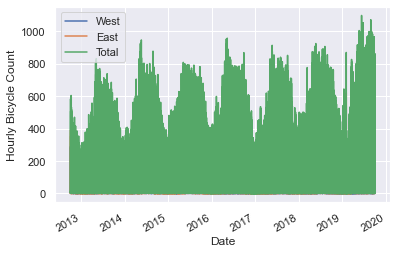

In [107]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

## [ resample() 메소드의 시간 단위 구간 설정 ]

- 5분 단위 구간    : resample('5T')

- 10분 단위 구간  : resample('10T')

- 20분 단위 구간 : resample('20T')

- 1시간 단위 구간 : resample('1H')

- 1일 단위 구간    : resample('1D')

- 1주일 단위 구간 : resample('1W')

- 1달 단위 구간    : resample('1M')

- 1년 단위 구간    : resample('1Y')




### .resample().함수명()
- 요일
- 년별
- 매년
- 매주 
- 날짜 
- 괄호안에 값을 주기로 묶고 함수명으로 값을 보여준다.

In [108]:
data.resample('W').sum()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0
...,...,...,...
2019-09-08,10932.0,17622.0,28554.0
2019-09-15,9489.0,16344.0,25833.0
2019-09-22,9096.0,16103.0,25199.0


## plot style 을 지정

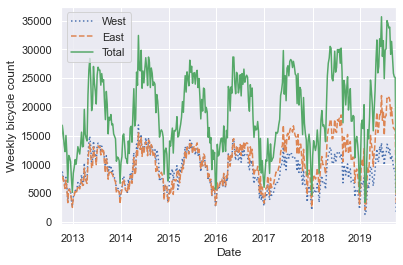

In [109]:
weekly = data.resample('W').sum() #1 year consists of 52 weeks
weekly.plot(style=[':', '--', '-']) #separate the plot from the three columns
plt.ylabel('Weekly bicycle count');

## .index.time
### 하루의 평균값을 시간단위로 보고 싶을때 사용한다.

In [110]:
data.groupby(data.index.time).mean()

,West,East,Total
00:00:00,5.054816,6.795223,11.850039
01:00:00,2.825764,3.447925,6.273688
02:00:00,2.003923,2.125539,4.129463
03:00:00,1.567737,1.469851,3.037588
04:00:00,3.551292,3.142913,6.694205
05:00:00,16.352388,10.074393,26.426782
06:00:00,56.413469,36.033673,92.447142
07:00:00,147.527408,85.638998,233.166406
08:00:00,198.488254,131.081441,329.569695
09:00:00,106.688210,85.665492,192.353702


## 4 * 60 * 60 * np.arange(6)
### 4시간 60분 60초 6개 
### '시간' '분' '초' '개'의 형태를 맞춰줘야 한다.

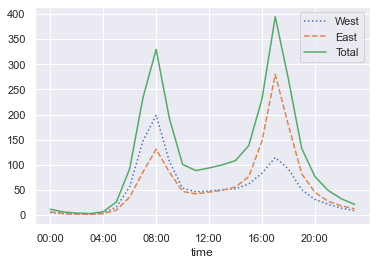

In [113]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

## 0: monday~ dayofweek

In [114]:
data.groupby(data.index.dayofweek).mean()

,West,East,Total
Date,,,
0,60.330251,73.444064,133.774315
1,64.858370,78.187199,143.045569
2,64.293493,77.515639,141.809132
3,61.463699,73.250342,134.714041
4,55.307719,66.122859,121.430578
5,32.577055,31.839498,64.416553
6,31.456768,29.787207,61.243975


## 요일별 시각화

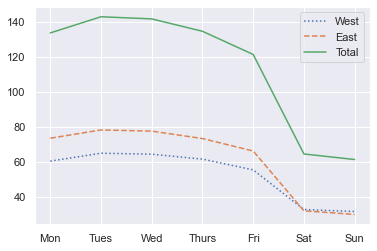

In [116]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

## np.where
### where함수는 조건문을 사용할 때 사용하고, 출력은 인덱스를 기본으로 출력한다.

In [74]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

## 주말과 평일에 대한 수치를 나타내주는 그래프

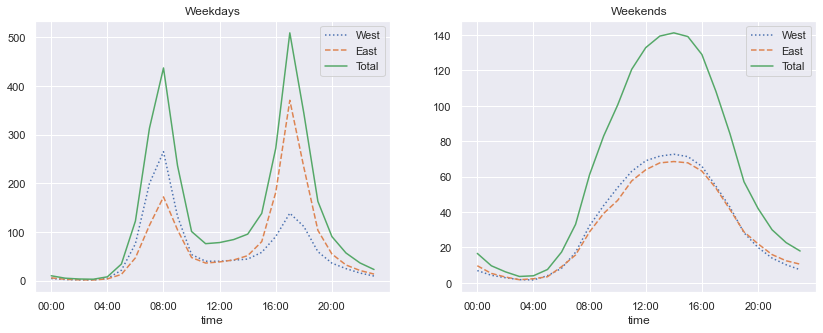

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-']) #the first graph for weekdays
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']); #the second graph for weekdends

In [126]:
!pip install pandas-datareader

## .DataReader(data , start = , end = , data_source = )
### 년도의 시작과 끝을 지정하여 데이터를 불러올 수 있다.
### 시작끝
### 처음부터

In [127]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [128]:
goog = goog['Close']

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

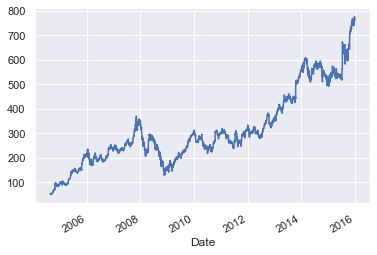

In [130]:
goog.plot();

## resample(BA):/ 그래프에서의 의미: 전년도 평균
## .asfreq(BA) : 분기단위 / 그래프에서의 의미 : 한해의 마지막 값 
## upper left : 범례의 위치
## legend :범례   
BA : Business year end frequency


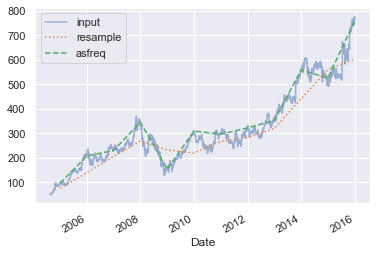

In [131]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

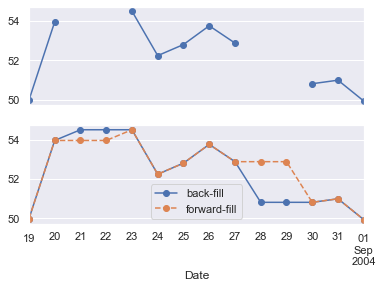

In [133]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10] # 10개 데이터 이용

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Machine Learning 머신러닝

Supervised Learning : 데이터의 측정된 데이터와 관련된 일부 label 사이의 관계를 모델링 하는것이고, 이 모델이 결정되면 새로운 알려지지 않은 데이터에 label을 적용하여 사용할 수 있다. 
- Target 데이터가 수치형이면 Regression을 사용하고, target 데이터가 categorical이면 clasification을 사용한다. 

Unsupervised Learning : 어떤 label도 참조하지 않고, 데이터 집합의 기능을 모델링 하는 것이고 데이터 집합이 자신을 대변하는것으로 설명(letting the dataset speak for itself.)   
- target이 존재하지 않는 것이다. 
- 이러한 모델에는 Clustering(categorical) , dimensionality reduction(numerical) (속성삭제) 이 사용된다.


**Supervised learning** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into **classification** tasks and **regression** tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
We will see examples of both types of supervised learning in the following section.

**Unsupervised learning** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as **clustering** and **dimensionality reduction.**
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
We will see examples of both types of unsupervised learning in the following section.

## feature 4개(꽃받침,꽃잎) / target(종) 
### target 이 categorical 이니까 classfication이다
### matrix 
### n_samples = row   /  n_targets = column

In [138]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## hue 로 기준을 잡는다.  시각화 분석
### petal_length와 sepal_width는 clear하게 구별되어 볼 수 있다. (2.5이상이면 주황색이나 초록색
### sepal_length와 sepal_width는 데이터가 섞여 있어서 제대로 구별할 수가 없다.
### label/target이 3개
### 세번째 행에 있는 그래프들 => clear하게 구별 
### petal_length은 종을 구별하기가 좋은 특성임
### petal_width가 1보다 크면 누구를 볼수 있고 없고의 분석을 볼수있음


C:\Users\82106\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


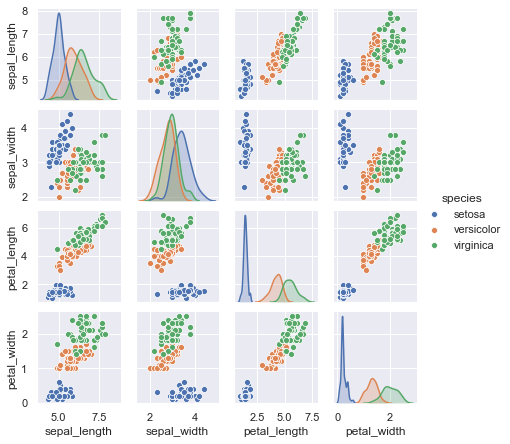

In [135]:
sns.pairplot(iris, hue='species', size=1.5);

## x는 matrix(행렬) , y는 vector(벡터)


In [140]:
#extract the features only
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [141]:
#extract the label only
y_iris = iris['species']
y_iris.shape

(150,)

In [142]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##  .relplot : label을 아니까 쉽게 구별 가능(hue의기능이자 , hue와 같이사용함 (범주형1, 수치형2)

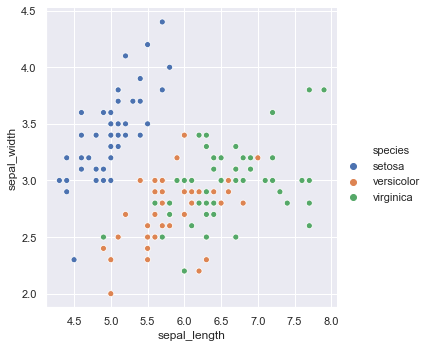

In [143]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

## scatterplot : 구별힘듬

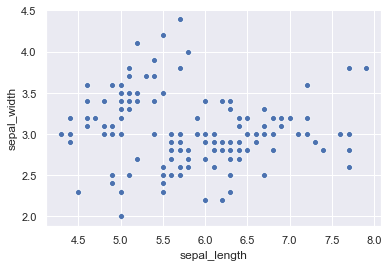

In [144]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

## sns.regplot(x = iris[ "sepal_length" ], y = iris[ "sepal_width" ]) 
### regplot을 이용해서 regression line(회귀선)을 나타낼 수 있다.
### 회귀선을 이용하는 이유는 상관관계를 나타내기 위해 사용
### 양의 상관관계를 가지면, x축이 증가함에 따라 y축도 증가
### 음의 상관관계를 가지면, x축이 증가함에 따라 Y축은 감소
#### 아래의 그래프는 회귀선이 거의 수평에 가까우므로, sepal_length와 sepal_width는 상관관계가 없다고 볼 수 있다.

- *feature 1*, *feature 2*, etc. $\to$ sepal_length, sepal_width, petal_length, petal_width 
- *label* $\to$ "iris setosa", "iris versicolor" or "iris virginica"

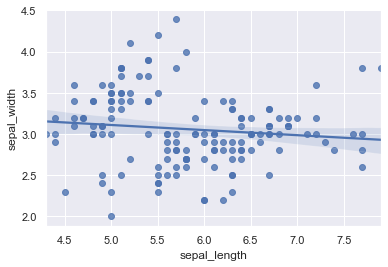

In [145]:
sns.regplot(x = iris[ "sepal_length" ], y = iris[ "sepal_width" ]) 

- *feature 1*, *feature 2*, etc. $\to$ pclass, sex, age, fare, class, embarked 
- *label* $\to$ "survived" or "not survived"
- If the label contains two options, we call it **binary classification*. , (survived , not survived)**
- If the label contains more than two options, we call it **multi-class classification**.

In [146]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- *feature 1*, *feature 2*, etc. $\to$ total_bill, sex, smoker, day, time, size 
- *label* $\to$ "the amount of tip"

In [147]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- *feature 1*, *feature 2*, etc. $\to$ cylinders, displacement, horsepower, weight, acceleration, model_year, origin 
- *label* $\to$ "mpg"

In [148]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### 그냥 scatterplot으로 하면 디폴트 색상이 파란색이므로, 군집(clustering)이 2개

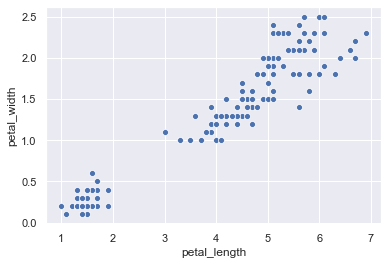

In [162]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris)

#### 범주형 컬럼을 기준으로 나누어 두가지 수치형 변수에 대해 나타내는 방법.
#### hue를 기준으로, 나누면 clustering (군집)이 3개

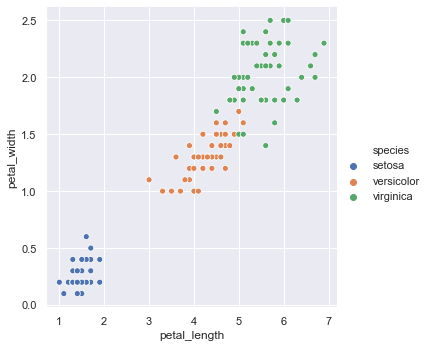

In [172]:
#looking the visualization with the label
sns.relplot(x="petal_length", y="petal_width", hue="species", data=iris)


- Association Rule은 큰 데이터베이스에서 변수들 간의 흥미로운 관계를 발견하기 위한 규칙 기반의 기계 학습 방법이다. 그것은 흥미의 몇 가지 척도를 사용하여 데이터베이스에서 발견된 강력한 규칙을 식별하기 위한 것이다.
- Association Rule is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.
------------------------------------------------------------------------
- 기능 값이 0/1인 두 가지 값만 사용하는 데이터 집합에서 연결 규칙을 사용할 수 있다
- We can use Association Rules in any dataset where features take only two values i.e., 0/1. 
----------------------------------------------------------------
- ## Summary

Here we have seen a few simple examples of some of the basic types of machine learning approaches.
Needless to say, there are a number of important practical details that we have glossed over, but I hope this section was enough to give you a basic idea of what types of problems machine learning approaches can solve.

In short, we saw the following:

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  

- *Association Rule*: Models that identify patterns of market basket. It can be extended to *Sequential pattern*
    
In the following sections we will go into much greater depth within these categories, and see some more interesting examples of where these concepts can be useful.


# Linear Regression

### 보통 인덱스가 없지만 이 엑셀에는 인덱스가 있어서 0번째 컬럼 지정

In [4]:
!pip install statsmodels 
data = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.9/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### describe해석 예시
### 분석예시
THe data consist of 200 rows and 4 columns.

the spending of tv advertising is about 147.042 (at the average)

the spending of radio advertising is about 23.264 (at the average)

the spending of news advertising is about 30.554 (at the average)

In [34]:
# figure out the data using "describe"
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## .subplot ( 행 의 개수 , 열 의 개수 , sharey = True)
### Sharey 는 공통되게 나타나는 부분은 하나로 통일 시켜줌.
### ax=axs[0] 는 0번째 부분에 그래프를 넣는다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


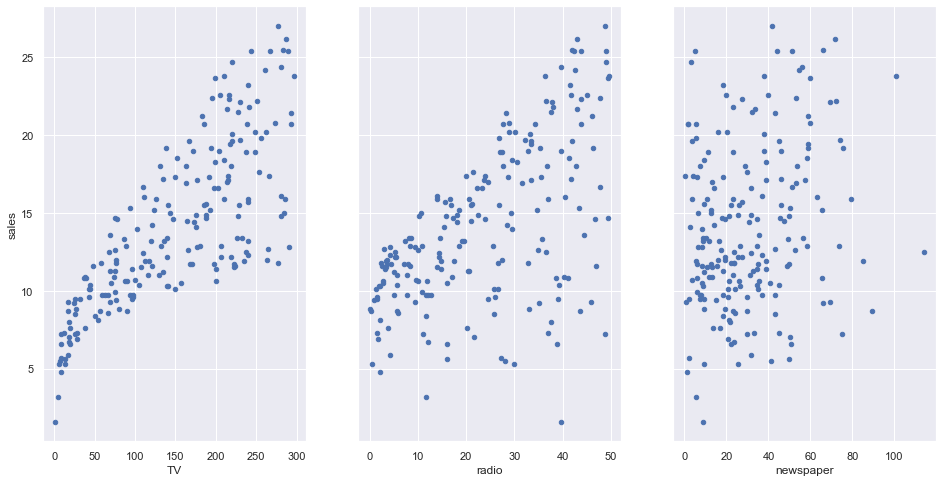

In [35]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

## One sample t-test and two sample t-test

이 값은 일반적으로 알파(산술 기호 )로 표시되며 일반적으로 0.05 또는 5%로 각 표본에서 유사한 종류의 결과를 제공할 수 있도록 95% 신뢰성이 있어야 함을 의미한다.

*타입 I 오류*: 가설이 사실이었지만,귀무 가설을 기각하는 경우 제1종 오류는 알파로 표시된다. 가설 검정에서 임계 영역을 나타내는 정규 곡선을 알파 영역이라고 한다.

*타입 II 오류*: 귀무 가설을 수용하지만, 가설이 거짓인 경우 타입 II 오류는 베타 버전으로 표시된다. 가설 검정에서 합격 영역을 나타내는 정규 곡선을 베타 영역이라고 한다.

In [36]:
from scipy.stats import ttest_1samp
TV_mean = np.mean(data['TV'])
TV_mean

147.0425

## One tailed test
## T-test : 두 집단 간의 평균의 차이가 유의미한 지 검증하는 가장 보편적인 통계 방법이다. (반드시  두 집단은 독립적이어야한다.)
### p-value 가 0.05보다 크면 H0(차이가없다)를 기각하는데 실패 
### => 차이가없다. 
### 통상 0.05보다 같거나 적다면 두 집단은 유의미한 차이가 있다.
- **귀무가설** : TV광고비의 평균은 100 과 차이가 없다
- **대립가설** : TV광고비의 평균은 100 과 차이가 있다.
- **Null hypothesis**: The mean of TV data equals to 100
- **Alternative hypothesis**: The mean of TV data does not equals to 100.
### p-value가 0.05보다 작으므로 귀무가설을 기각하였다. 따라서 대립가설을 채택한다. 고로 차이가 있다.
----------------------------------------------------
## p해석  : 
- P<0.05 : 'p-value'값이 0.05보다 작으면, 귀무가설을 기각하므로, 두 집단은 유의미한 차이가 있다.
- If the 'p-value' value is less than 0.05, the two groups have significant differences because they reject the null hypothesis.
---------------------------------------------------
- P>=0.05 : 'p-value'값이 0.05보다 크면, 귀무가설을 기각하는데 실패하므로, 두 집단은 유의미한 차이가 없다.
- If the 'p-value' value is greater than 0.05, it will fail to reject the null hypothesis, so there is no significant difference between the two groups.

In [37]:
tset, pval = ttest_1samp(data['TV'], 100) #

In [40]:
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are failing to reject null hypothesis")

p-values 4.648672064620753e-13
 we are rejecting null hypothesis


## Paired difference test / two sample t-test
In the above example, 
- **Null hypothesis**: The mean of "Newspaper" data equals to the mean of "radio" data
- **Alternate hypothesis**: The mean of "Newspaper" data does not equal to the mean of "radio" data

When the result is rejecting the null hypothesis, it means that the null hypothesis is not statistically significant.
### newspaper 와 radio의 평균의 차이가 없다. 있다를 비교
### p-value값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택하였다. 따라서 두 집단의 평균의 차이가 있다.

In [158]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(data['newspaper'],data['radio'])
print("ttest", ttest)
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject (accept) null hypothesis")

ttest 3.911403345381785
p-value 0.00010787842848379703
we reject null hypothesis


## t해석
- 't-value'가 크다는 것은 데이터들 간의 편차가 작다는 것을 의미한다. 
-  A large 't-value' means a small deviation between the data.
----------------------------------------------------------
- 't-value'가 작다는 것은 데이터들 간의 편차가 크다는 것을 의미한다.   
- A small 't-value' means a large deviation between the data.

그러므로 유의미한 결과가 나오려면 t 값은 커야 한다.
### freedom은 통계적 추정을 할 때 표본자료 중 모집단에 대한 정보를 주는 독립적인 자료의 수

### sm.stats.ttest_ind 은 두 집단이 등분산이라는 것을 가정하여, t-test를 하고자 하는 code

In [159]:
#an alternative way to do the two sample t-test
import statsmodels.api as sm
sm.stats.ttest_ind(data['newspaper'], data['radio'])
#the last value is the degree of freedom

(3.9114033453817965, 0.00010787842848379205, 398.0)

# Simple Linear Regression
Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

In [3]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf



### 만약에 tv radio nwespaper를 광고에 쓰면 sales에 영향을 줄거다

### TV를 1올리면  Sales에 0.047537만큼 올라간다.
### import statsmodels.formula.api as smf
### lm = smf.ols(formula='sales ~ TV', data=data).fit()

- “formula” API는 문자열로 종속변화 설명변수를 식별
-  종속 ~ 독립 : ~가 구별자
- smf.ols는 인자로 문자열 공식과 데이터프레임 live를 받고, 모형을 표현하는 OLS객체를 반환한다. 
- ols 는 “ordinary least squares” 약자다.
- fit()는 모형을 데이터에 적합하고 결과를 담고 있는 객체 RegressionResults를 반환한다. 즉, 결과를 얻기위해 써준다.

### lm.params 
- 절편과 기울기를 얻을 수 있음


- sales : y
- tv : x 
- 만약  $\beta_1$가 음수면 sales는 감소한다.
$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [43]:
# create a fitted model in one line

lm = smf.ols(formula='sales ~ TV', data=data).fit() ### 종속변수 ~ 독립변수


# print the coefficients
lm.params

# intercept
# tv


Intercept    7.032594
TV           0.047537
dtype: float64

- TV광고비가 5만 달러인 새로운 시장이 생겼다고 가정, 그에대해 Sale 예상
- 9409개의 판매를 예상할 수 있다.
- Startsmodel 사용

In [44]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [45]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


## lm.predict()
### 선형 모델을 사용하여 y(종속 변수)를 예측
- 마찬가지로, 9409개의 Sales를 예측할 수 있다.

In [47]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:
x의 관측치 중 가장 작고 가장 큰 값을 예측한 다음 예측 값을 사용하여 최소 제곱선을 표시해 봅시다.
- Series : statistical measure : min, max, mean, median, etc.

In [48]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


## lm.predict
### DataFrame에서만 사용가능, Series 형태에서는 사용할 수 없다.
### x가 min일 때, y값을 예측 
### x가 max일 때, y값을 예측

In [56]:
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

## data.plot(kind='scatter', x='TV', y='sales')
- 그래프를그린다.

## plt.plot(X_new, preds, c='red', linewidth=2)
- 회귀선을 표시한다.
----------------------------------------------------------
- 간단하게 scatter plot에 회귀선을 그릴 수 있는 또다른 방법. 
#### sns.regplot(x=X[['alcohol_x']],  y=X[['alcohol_y']], fit_reg=True)
#### plt.title("White vs Red")
#### plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


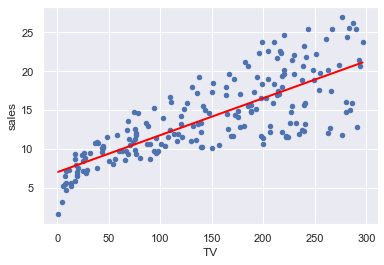

In [65]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Confidence in our Model
Question: Is linear regression a high bias/low variance model, or a low bias/high variance model?

Answer: High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

모델에 대한 자신감
질문:. 선형 회귀 분석은 높은 치우침/낮은 분산 모형인가, 아니면 낮은 치우침/높은 분산 모형인가?

답변: 높은 치우침/낮은 분산. 반복 표본 추출에서는 선이 대략 같은 위치에 유지되지만(저분산) 그러한 모델의 평균은 실제 관계를 포착하는 데 큰 도움이 되지 않을 것이다(높은 치우침). 낮은 분산은 훈련 데이터가 많지 않을 때 유용한 특성이라는 점에 유의하십시오!

밀접하게 연관된 개념은 신뢰 구간이다. Statsmodels는 모형 계수에 대해 95% 신뢰 구간을 계산하며 다음과 같이 해석된다. 이 표본을 추출한 모집단을 100번 표본으로 추출한 경우, 이러한 신뢰 구간 중 약 95개는 "참" 계수를 포함할 것이다.

- 신뢰 구간은 표본 통계량에서 파생되어 알 수 없는 모집단 모수 값이 포함될 가능성이 있는 값의 범위입니다 
- 신뢰구간에서 95%가 의미하는 바는 같은 크기의 표본을 여러 번 추출하여 신뢰구간을 구할 경우, 그 중 약 95%의 구간이 모수를 포함한다고 해석해야 한다.
## 신뢰구간해석


confidence ('interval') (신뢰구간) means the area on which is a confidence in the significant level.
In this example, if the ('intercept') is in between 6.129719 and 7.935468, it is in the significant level based on the statistical inference.

In other word, the value 6.129719 and 7.935468 is the 신뢰한계(confidence limits).

In [69]:
lm.conf_int()
# print the confidence intervals for the model coefficients
# 따라서 모집단의 평균이 6.12~7.93의 신뢰할 수 있는 구간에 있을 것이라 추정.
# 구간은 7.025 +- 0.905으로 나타내지므로, 오차한계(Margin of error)는 0.905

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843



## 가설 검정 및 p-값

신뢰구간과 밀접한 관련이 있는 것은 **hypothesis testing**이다.

("가설 기각 실패"는 귀무 가설을 "허용"하는 것과 같지 않다는 점에 유의하십시오. 그 대립 가설은 사실일 수 있다. 단, 그것을 보여줄 충분한 데이터가 없다는 것을 제외한다면)

$$y = \beta_0 + \beta_1x$$
- **귀무 가설:** TV 광고와 판매 사이에는 관계가 없다(따라서 $\beta_1$은 0이다).
- **대립 가설:** TV 광고와 판매 사이에 관계가 있음(따라서 $\beta_1$은 0과 같지 않음)

이 가설을 ,어떻게 시험할 것인가? 
직관적으로 95% 신뢰 구간 0을 포함하지 않으면 귀무가설을 기각한다(대립가설 채택한다) 반대로 **p-value**은 계수가 실제로 0일 확률을 나타낸다.

만약에, 95% 신뢰 구간이 0을 포함하는 경우, 해당 계수에 대한 p-값은 0.05보다 큰 값이 된다.95% 신뢰 구간이 0 을 포함하지 않을 경우 p-값은 0.05보다 작다. 따라서 0.05보다 작은 p-값은 feature와 resopnse사이에 관계가 있을 가능성이 있는지 여부를 결정하는 한 가지 방법이다. (또한 0.05를 컷오프로 사용하는 것은 하나의 관례에 불과하다.)

이 경우 TV에 대한 p-값은 0.05보다 훨씬 작기 때문에 우리는 TV 광고와 판매 사이에 관계가 있다고 믿는다.

- 95% 신뢰 구간이 0을 포함하는 경우, 해당 계수에 대한 p-값은 0.05보다 큰 값이 된다. 관계가 없다 (기각실패)

- 95% 신뢰 구간이 0을 포함하지 않는 tv 의 경우, p-값은 0.05보다 훨씬 작기 때문에 우리는 TV 광고와 판매 사이에 관계가 있다. (기각 성공)

일반적으로 인터셉트에 대한 p-값은 무시한다는 점에 유의하십시오.

In [67]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### 선형 회귀분석 선이 모든 데이터 요소가 잘 맞는지 즉 선형 모형의 전체 적합도를 평가하는 가장 일반적인 방법은 **R-제곱** 값을 사용하는 것이다.
- 결정 계수는 반응변수의 전체변동 중 예측변수가 차지하는 변동의 비율, 독립변수로부터 예측되는 종속변수의 분산의 비율을 의미한다.
-  X가 Y를 얼마나 설명하는지에 대한 정보 제공 (= 회귀식은 얼마나 정확한가?)

흐야 설명 - 
 R-제곱은 모형이 설명하는 **분산 비율***이며, 이는 모형이 설명하는 관측된 데이터의 분산 비율이나 **null 모형에 대한 오차 감소를 의미한다. (null 모형은 관측된 반응의 평균만 예측하므로 절편과 기울기가 없다.)

## R해석
R-squared는 0부터 1사이의 값을 가진다.
- 'R-squared' has a value between 0 and 1. [ 0.7을 기준]
------------------------------------------------------------------------
- 결정계수 = 1 : 회귀직선으로 Y를 완전히 설명 가능. 회귀식의 정확도 매우 높음.
- It is possible to describe 'Y' in a regression line. Therefore, the accuracy of the regression equation is very high.
-----------------------------------------------------------------------
- 결정계수 = 0. 추정된 회귀직선은 X와 Y의 관계 설명 불가. 회귀식의 정확도 매우 낮음.
- The estimated regression line is difficult to explain the relationship between X and Y. Therefore, the accuracy of the regression equation can be considered low.

- 자료의 편차가 클수록 R-Squared값은 작아진다.
- The greater the deviation of the data, the smaller the 'R-Squared' value.
--------------------------------------------------------------------------
예를들어 R^2 =0.1 이면 Y의 분산의 10%를 X에서 예측 가능하고, R2 =0.2 이면 Y의 분산의 20%를 예측 가능하다.

**파란선**이 데이터의 일부 분산(R-제곱=0.54)을 설명하고, **녹색선**이 더 많은 분산(R-제곱=0.64)을 설명하고, **제곱선***이 교육 데이터를 훨씬 더 잘 적합(R-제곱=0.66)한 것을 알 수 있다(빨간색선이 과적합처럼 보이나?)

"좋은" R 제곱 값인가? 말하기 어렵다. 양호한 R 제곱 값의 임계값은 도메인에 따라 크게 달라진다. 따라서 다른 모델을 비교하는 **의 도구로 가장 유용하다.

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared 

"looks like":

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)


In [62]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

해석: TV 광고에 1000달러 증가는 , sales에 45.765 증가한다.

In [5]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

### 전체해석
#### TV와 Radio는 유의미한 p-value 값을 가지고 있는 반면에, Newspaper는 그렇지 않다. 따라서 우리는 TV와 Radio에 대한 귀무가설을 기각하고 Newspaper에 대한 귀무가설을 기각하는데 실패한다.
#### TV와 Radio는 Sales에 대해 양의 상관관계를 갖고있고, 반면에 Newspaper는 음의상관관계를 갖고있다.  - coef
#### 이 model은 R-Squared가 (0.897)로 높다. 따라서 TV만 포함하는 model 보다 데이터에 더 잘 맞는 model이다. 

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.


In [6]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        14:39:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 기준점
The most common metrics to look at while selecting the model are:

|Statistic    | Criterion|
|---------    | ---------|
|R-Squared    | Higher the better ( >0.7) |
|Adj R-Squared| Higher the better |
|F-Statistic  |Higher the better ( >0.7) |
|Std. Error   |Closer to zero the better |
|t-statistic  |Should be greater 1.96 for p-value to be less than 0.05 |
|AIC (Akaike’s information criterion)         |Lower the better |
|BIC (Bayesian information criterion)          |Lower the better |
|MAPE (mean absolute percentage error) | Lower the better |
|MSE (mean squared error)          |Lower the better |


## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [75]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

PatsyError: Error evaluating factor: NameError: name 'newspaper' is not defined
    sales ~ TV + radio + newspaper
                         ^^^^^^^^^

output
- Intercept    2.938889
- TV           0.045765
- radio        0.188530
- newspaper   -0.001037
- dtype: float64
- How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.